In [54]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
import warnings
from pyramid.arima import auto_arima

warnings.filterwarnings('ignore')
plt.style.use('bmh')
%matplotlib inline

In [63]:
# Load the dataset
data = pd.read_csv('../raw data/BTC-USD.csv')

In [64]:
# Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data.resample('D').mean()
data = data.ffill()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [4]:
# Check missing values
np.where(np.isnan(data))

(array([], dtype=int64), array([], dtype=int64))

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0.0
2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5.0
2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49.0
2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20.0
2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42.0


In [6]:
data.index

DatetimeIndex(['2010-07-16', '2010-07-17', '2010-07-18', '2010-07-19',
               '2010-07-20', '2010-07-21', '2010-07-22', '2010-07-23',
               '2010-07-24', '2010-07-25',
               ...
               '2019-03-23', '2019-03-24', '2019-03-25', '2019-03-26',
               '2019-03-27', '2019-03-28', '2019-03-29', '2019-03-30',
               '2019-03-31', '2019-04-01'],
              dtype='datetime64[ns]', name='Date', length=3182, freq='D')

<table><tr><td bgcolor=orange><font size=3> SARIMA for "High"

In [7]:
y = np.log(data['High'])

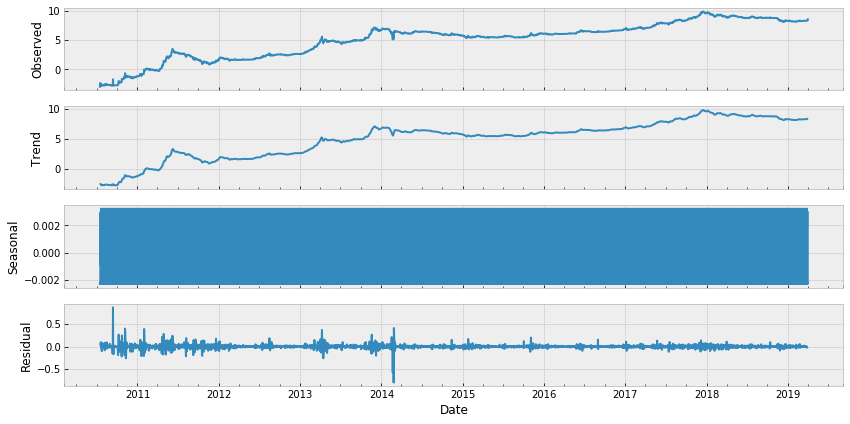

In [8]:
rcParams['figure.figsize'] = 12, 6

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [9]:
# y = y['2017':]

In [10]:
# rcParams['figure.figsize'] = 12, 6

# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()

### Build a Baseline Model

In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.resample('MS').mean()
    rolstd = timeseries.resample('MS').std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    print()
    #Perform Ljung-Box test:
    print('Results of Ljung-Box Test:')
    lbtest = acorr_ljungbox(timeseries, lags=5)
    for i in range(5):
        print('Largest Lag Included:{} Test Statistic={}  p-value={}'.format(i, lbtest[0][i], lbtest[1][i]))

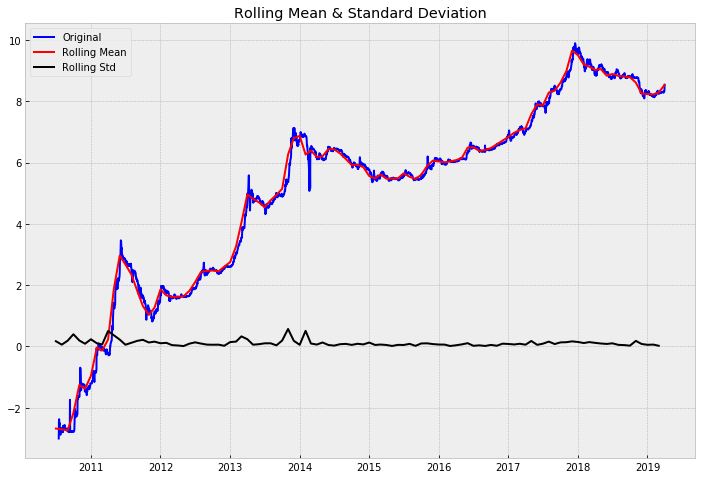

Results of Dickey-Fuller Test:
Test Statistic                   -2.649021
p-value                           0.083283
#Lags Used                       15.000000
Number of Observations Used    3166.000000
Critical Value (1%)              -3.432417
Critical Value (5%)              -2.862453
Critical Value (10%)             -2.567256
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=3175.0690377435467  p-value=0.0
Largest Lag Included:1 Test Statistic=6342.4774848484785  p-value=0.0
Largest Lag Included:2 Test Statistic=9502.546952592318  p-value=0.0
Largest Lag Included:3 Test Statistic=12655.097184608485  p-value=0.0
Largest Lag Included:4 Test Statistic=15799.803868535331  p-value=0.0


In [12]:
test_stationarity(y)

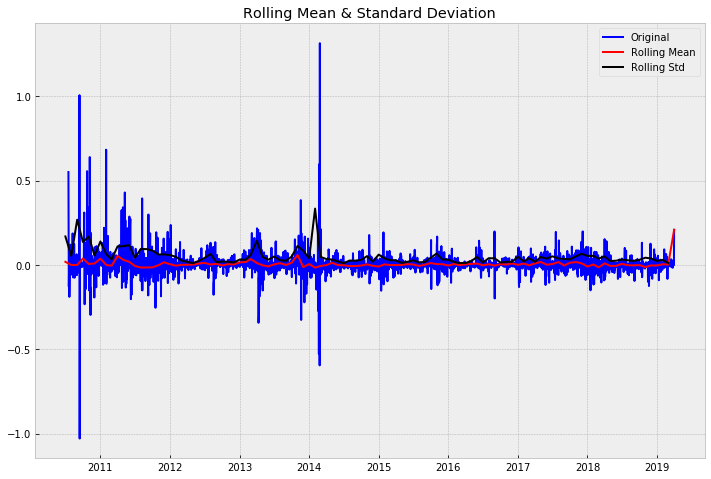

Results of Dickey-Fuller Test:
Test Statistic                -1.245821e+01
p-value                        3.452656e-23
#Lags Used                     1.400000e+01
Number of Observations Used    3.166000e+03
Critical Value (1%)           -3.432417e+00
Critical Value (5%)           -2.862453e+00
Critical Value (10%)          -2.567256e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=7.646275907173491  p-value=0.005688964372642836
Largest Lag Included:1 Test Statistic=18.25884812678308  p-value=0.00010842801478291534
Largest Lag Included:2 Test Statistic=18.81042204075064  p-value=0.0002992166846522326
Largest Lag Included:3 Test Statistic=43.99183175912142  p-value=6.4408890838994784e-09
Largest Lag Included:4 Test Statistic=45.418850278575725  p-value=1.1924855483330411e-08


In [13]:
test_stationarity(y.diff(1).dropna())

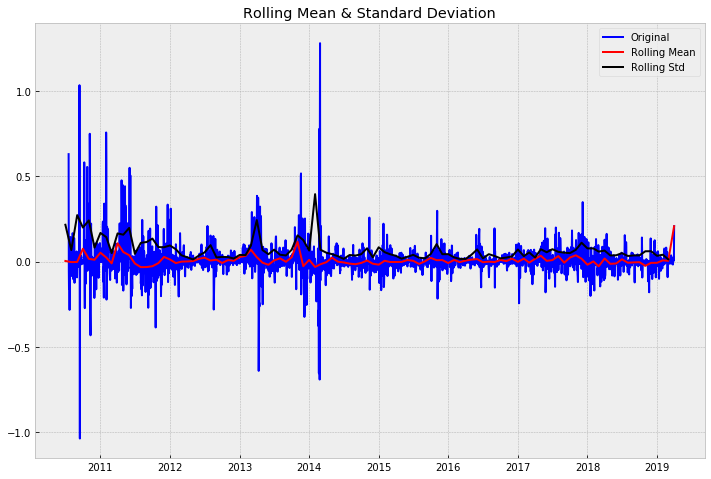

Results of Dickey-Fuller Test:
Test Statistic                -8.667858e+00
p-value                        4.631791e-14
#Lags Used                     2.700000e+01
Number of Observations Used    3.152000e+03
Critical Value (1%)           -3.432426e+00
Critical Value (5%)           -2.862457e+00
Critical Value (10%)          -2.567258e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=603.6925393308826  p-value=2.6341858749133287e-133
Largest Lag Included:1 Test Statistic=631.4909323678394  p-value=7.472851470448212e-138
Largest Lag Included:2 Test Statistic=631.5974803314317  p-value=1.422970828786499e-136
Largest Lag Included:3 Test Statistic=650.2049345468957  p-value=2.1044881985553013e-139
Largest Lag Included:4 Test Statistic=656.7694664326743  p-value=1.0895393545488075e-139


In [14]:
test_stationarity(y.diff(2).dropna())

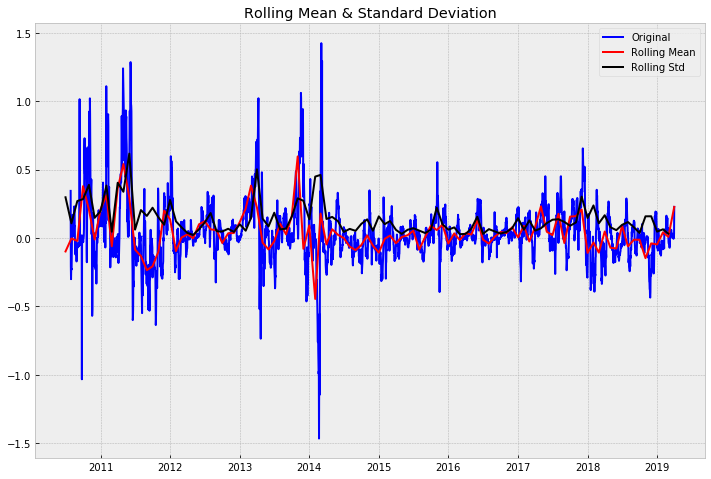

Results of Dickey-Fuller Test:
Test Statistic                -7.572619e+00
p-value                        2.815099e-11
#Lags Used                     2.800000e+01
Number of Observations Used    3.141000e+03
Critical Value (1%)           -3.432434e+00
Critical Value (5%)           -2.862461e+00
Critical Value (10%)          -2.567260e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=2626.7414201622346  p-value=0.0
Largest Lag Included:1 Test Statistic=4827.856326635975  p-value=0.0
Largest Lag Included:2 Test Statistic=6729.991252394565  p-value=0.0
Largest Lag Included:3 Test Statistic=8376.643830193267  p-value=0.0
Largest Lag Included:4 Test Statistic=9712.376545376113  p-value=0.0


In [15]:
test_stationarity(y.diff(12).dropna())

#### According to the decomposition of y_train, seasonality is relatively small. 
#### Comparing the results of the first and second difference, we use the first difference.

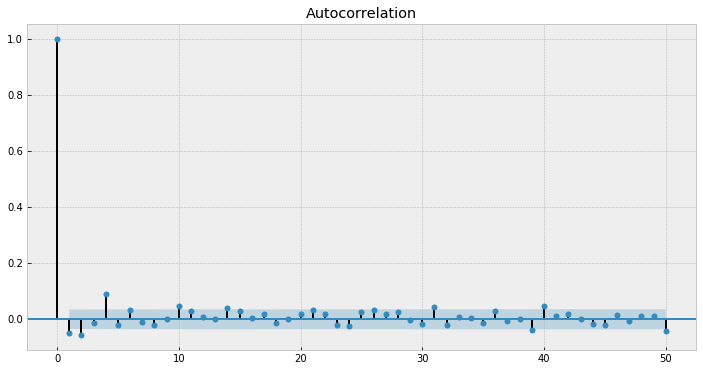

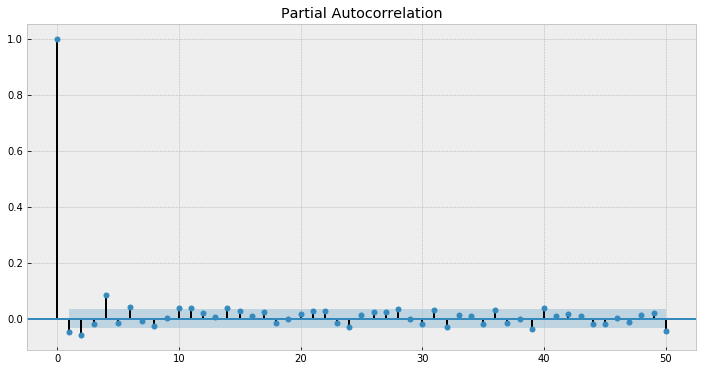

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
acf = plot_acf(y.diff(1).dropna(), lags=50)
pacf = plot_pacf(y.diff(1).dropna(), lags=50)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0045   1.65e-05    274.863      0.000       0.005       0.005
-8134.261592506874


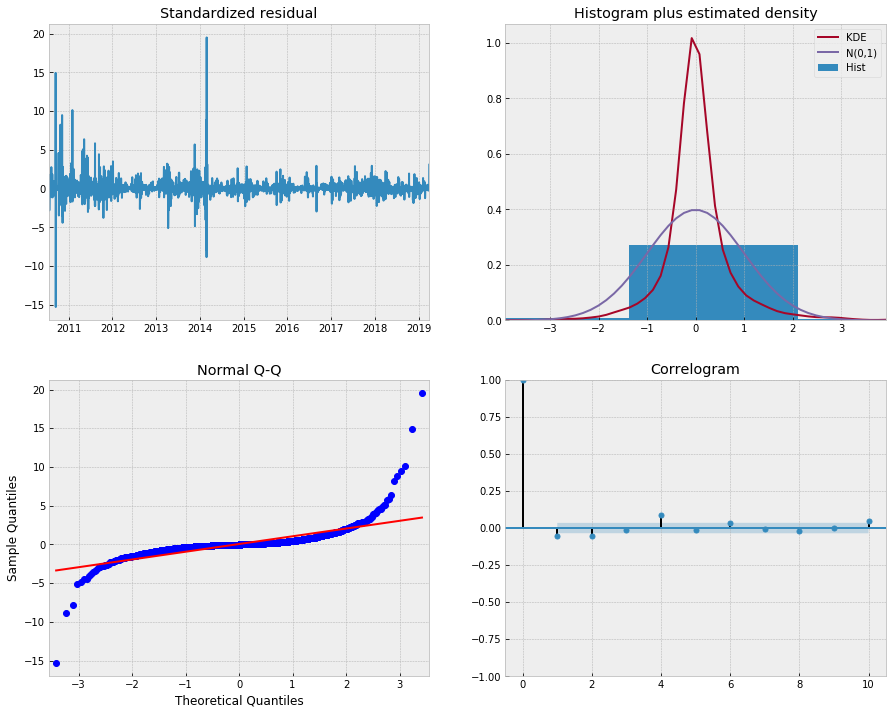

In [17]:
mod_baseline = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order = (0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_baseline = mod_baseline.fit()

print(results_baseline.summary().tables[1])
print(results_baseline.aic)
b = results_baseline.plot_diagnostics(figsize=(15, 12))

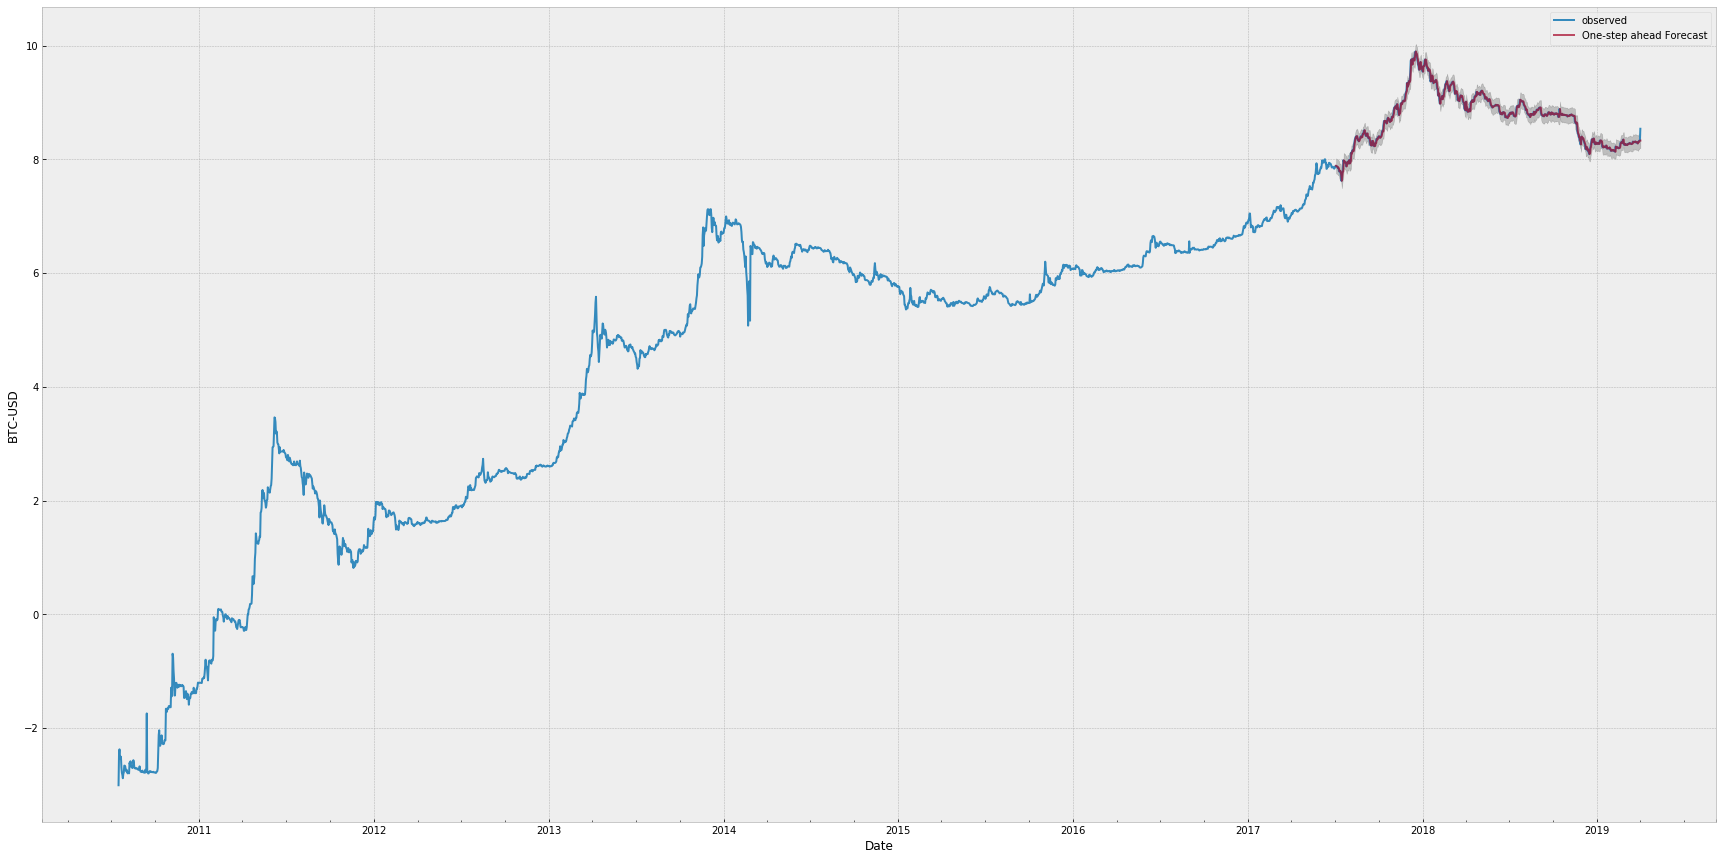

In [18]:
pred = results_baseline.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [19]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 0.0016
The R2 of our model is 0.9923


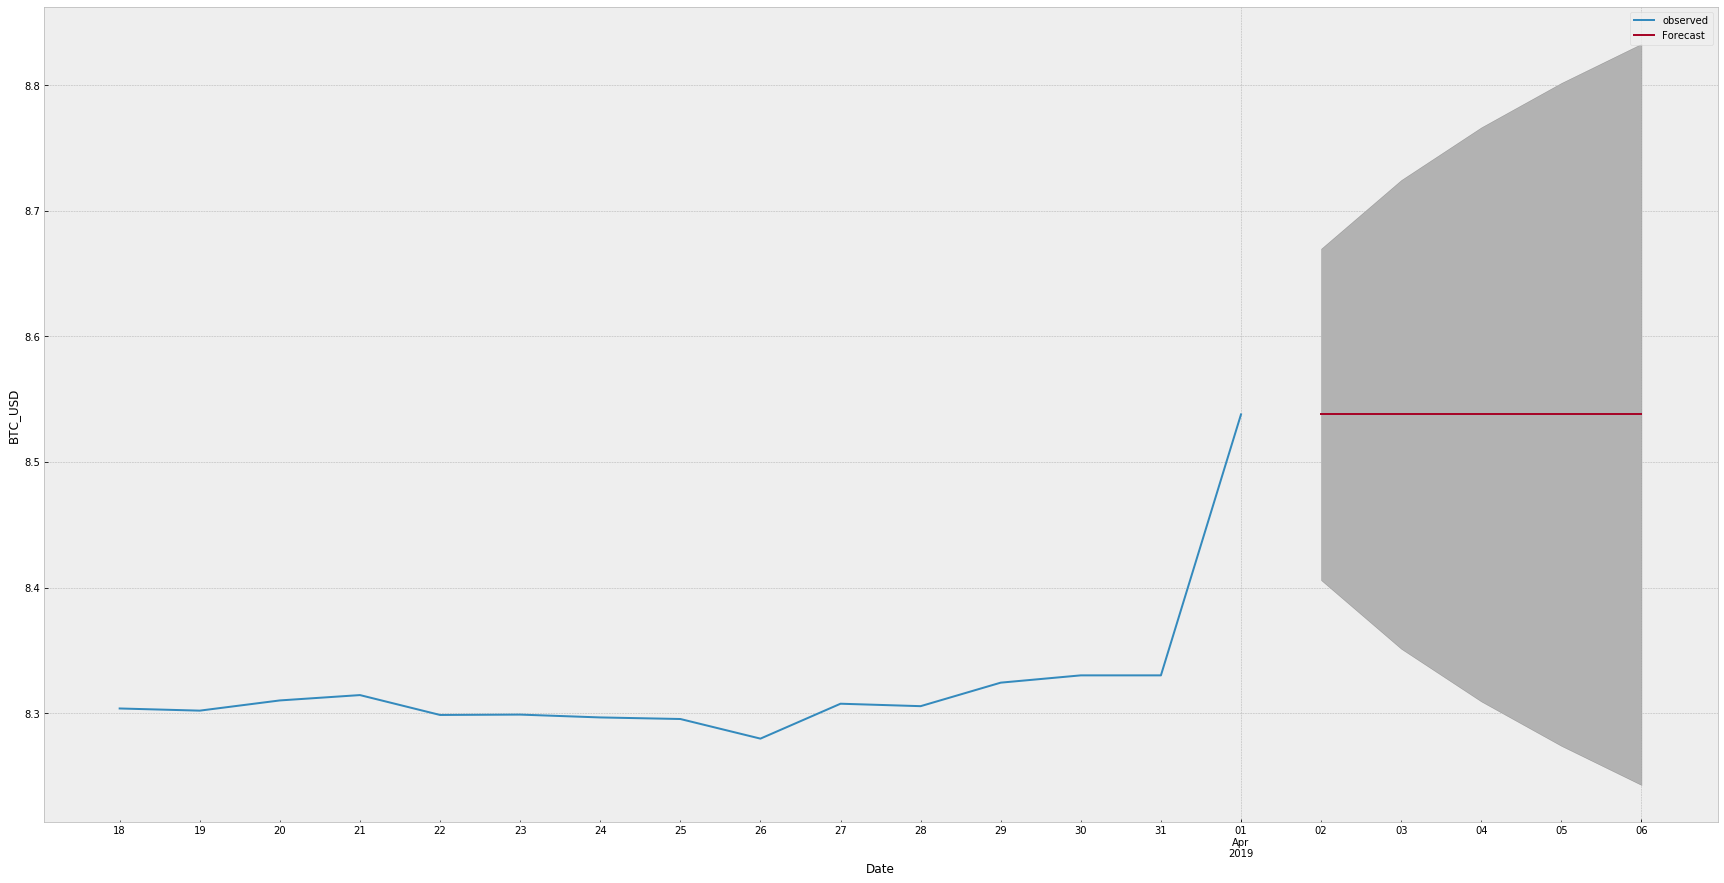

In [20]:
# Forcast the future
pred_uc = results_baseline.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

### Build an Advanced Model by Grid Search

In [24]:
# d = [1]
# p = q = range(21)
# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(0, 0, 0, 12)]

# print('Examples of parameter combinations for Seasonal ARIMA...')
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
# print('SARIMAX: {} x {}'.format(pdq[-2], seasonal_pdq[0]))
# print('SARIMAX: {} x {}'.format(pdq[-1], seasonal_pdq[0]))

d = [1]
p = q = range(4)
pdq = list(itertools.product(p, d, q))
D = range(3)
P = Q = range(4)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]


print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 1) x (0, 0, 2, 12)
SARIMAX: (0, 1, 2) x (0, 0, 3, 12)
SARIMAX: (0, 1, 2) x (0, 1, 0, 12)


In [25]:
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)

        except:
            continue

print('Finished...')

AIC_list = AIC_list.dropna()
m = np.amin(AIC_list['AIC'].values) # Find the minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find the index number of the lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-8134.261592506874
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-8111.098029075364
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:-8078.943583605469
ARIMA(0, 1, 0)x(0, 0, 3, 12)12 - AIC:-8042.591220002409
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-5949.121277691389
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-8001.81647512531
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:-7999.953712804358
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:-2497.456372872807
ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:-5821.987286287438
ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC:-7785.453987591425
ARIMA(0, 1, 0)x(0, 2, 3, 12)12 - AIC:-7953.233871331241
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-8114.708910072239
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-8108.866482031623
ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:-8076.940466502302
ARIMA(0, 1, 0)x(1, 0, 3, 12)12 - AIC:-8040.408221829273
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-6750.508825633495
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-8026.071344024607
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:-7998.427665

ARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:-5984.681741257583
ARIMA(0, 1, 3)x(0, 1, 1, 12)12 - AIC:-8031.248565467678
ARIMA(0, 1, 3)x(0, 1, 2, 12)12 - AIC:-8003.062218546652
ARIMA(0, 1, 3)x(0, 1, 3, 12)12 - AIC:-7964.545148945686
ARIMA(0, 1, 3)x(0, 2, 0, 12)12 - AIC:-2541.586500388281
ARIMA(0, 1, 3)x(0, 2, 1, 12)12 - AIC:-5858.996033974643
ARIMA(0, 1, 3)x(0, 2, 2, 12)12 - AIC:-7828.6480704140495
ARIMA(0, 1, 3)x(0, 2, 3, 12)12 - AIC:-7951.128605376224
ARIMA(0, 1, 3)x(1, 0, 0, 12)12 - AIC:-8126.201942989575
ARIMA(0, 1, 3)x(1, 0, 1, 12)12 - AIC:-8111.010063222234
ARIMA(0, 1, 3)x(1, 0, 2, 12)12 - AIC:-8078.641980376039
ARIMA(0, 1, 3)x(1, 0, 3, 12)12 - AIC:-8103.8802197882105
ARIMA(0, 1, 3)x(1, 1, 0, 12)12 - AIC:-6782.941338284994
ARIMA(0, 1, 3)x(1, 1, 1, 12)12 - AIC:-8030.808408990006
ARIMA(0, 1, 3)x(1, 1, 2, 12)12 - AIC:-8002.505492315409
ARIMA(0, 1, 3)x(1, 1, 3, 12)12 - AIC:-7326.338430664255
ARIMA(0, 1, 3)x(1, 2, 0, 12)12 - AIC:-4227.0943828284535
ARIMA(0, 1, 3)x(1, 2, 1, 12)12 - AIC:-6670.59

ARIMA(1, 1, 2)x(0, 1, 3, 12)12 - AIC:-7967.9048595021795
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:-2543.0074515947285
ARIMA(1, 1, 2)x(0, 2, 1, 12)12 - AIC:-5860.672148442407
ARIMA(1, 1, 2)x(0, 2, 2, 12)12 - AIC:-7828.8765817566
ARIMA(1, 1, 2)x(0, 2, 3, 12)12 - AIC:-7953.888662311355
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:-8122.678294728223
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:-8114.401289058472
ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:-8082.096777841969
ARIMA(1, 1, 2)x(1, 0, 3, 12)12 - AIC:-8104.659577209035
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:-6784.127663125662
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:-8033.949970751986
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:-8004.862608447702
ARIMA(1, 1, 2)x(1, 1, 3, 12)12 - AIC:-7327.981551531055
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:-4227.390303208895
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:-6671.5013096555485
ARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:-7829.3221071453845
ARIMA(1, 1, 2)x(1, 2, 3, 12)12 - AIC:-7960.523514636603
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:-8089.905

ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:-7830.468369946726
ARIMA(2, 1, 1)x(0, 2, 3, 12)12 - AIC:-7955.493357953263
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:-8120.669599656088
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:-8118.927112503638
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:-8087.029618094146
ARIMA(2, 1, 1)x(1, 0, 3, 12)12 - AIC:-8111.316065413205
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:-6785.866676100036
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:-8038.260477529209
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:-8009.163675592627
ARIMA(2, 1, 1)x(1, 1, 3, 12)12 - AIC:-8012.159388935137
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:-4231.116324426025
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:-6676.802631297385
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:-7830.487697458091
ARIMA(2, 1, 1)x(1, 2, 3, 12)12 - AIC:-7962.283680783828
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:-8089.094774410614
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:-8087.39943949818
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:-8153.106838127186
ARIMA(2, 1, 1)x(2, 0, 3, 12)12 - AIC:-8158.130496

ARIMA(3, 1, 0)x(1, 0, 1, 12)12 - AIC:-8116.315937004968
ARIMA(3, 1, 0)x(1, 0, 2, 12)12 - AIC:-8090.094151298815
ARIMA(3, 1, 0)x(1, 0, 3, 12)12 - AIC:-8115.203088270676
ARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:-6786.89122389672
ARIMA(3, 1, 0)x(1, 1, 1, 12)12 - AIC:-8037.08989443889
ARIMA(3, 1, 0)x(1, 1, 2, 12)12 - AIC:-8013.620343166026
ARIMA(3, 1, 0)x(1, 1, 3, 12)12 - AIC:-7340.981477816984
ARIMA(3, 1, 0)x(1, 2, 0, 12)12 - AIC:-4235.609129388778
ARIMA(3, 1, 0)x(1, 2, 1, 12)12 - AIC:-6678.299075887062
ARIMA(3, 1, 0)x(1, 2, 2, 12)12 - AIC:-7840.113872013651
ARIMA(3, 1, 0)x(1, 2, 3, 12)12 - AIC:-7970.124961134244
ARIMA(3, 1, 0)x(2, 0, 0, 12)12 - AIC:-8086.2755210478435
ARIMA(3, 1, 0)x(2, 0, 1, 12)12 - AIC:-8084.535343544986
ARIMA(3, 1, 0)x(2, 0, 2, 12)12 - AIC:-8195.84400295534
ARIMA(3, 1, 0)x(2, 0, 3, 12)12 - AIC:-8161.116664601179
ARIMA(3, 1, 0)x(2, 1, 0, 12)12 - AIC:-7186.586758528567
ARIMA(3, 1, 0)x(2, 1, 1, 12)12 - AIC:-8002.885216208572
ARIMA(3, 1, 0)x(2, 1, 2, 12)12 - AIC:-8039.4034780

ARIMA(3, 1, 3)x(1, 1, 0, 12)12 - AIC:-6803.116231122434
ARIMA(3, 1, 3)x(1, 1, 1, 12)12 - AIC:-8043.375725218187
ARIMA(3, 1, 3)x(1, 1, 2, 12)12 - AIC:-8019.373872290389
ARIMA(3, 1, 3)x(1, 1, 3, 12)12 - AIC:-8019.843077984258
ARIMA(3, 1, 3)x(1, 2, 0, 12)12 - AIC:-4479.412413325186
ARIMA(3, 1, 3)x(1, 2, 1, 12)12 - AIC:-6682.936115735355
ARIMA(3, 1, 3)x(1, 2, 2, 12)12 - AIC:-7829.878665916238
ARIMA(3, 1, 3)x(1, 2, 3, 12)12 - AIC:-7977.579620144811
ARIMA(3, 1, 3)x(2, 0, 0, 12)12 - AIC:-8104.721015724126
ARIMA(3, 1, 3)x(2, 0, 1, 12)12 - AIC:-8103.06112527117
ARIMA(3, 1, 3)x(2, 0, 2, 12)12 - AIC:-8189.443837315097
ARIMA(3, 1, 3)x(2, 0, 3, 12)12 - AIC:-8138.631463207506
ARIMA(3, 1, 3)x(2, 1, 0, 12)12 - AIC:-7201.673141387729
ARIMA(3, 1, 3)x(2, 1, 1, 12)12 - AIC:-8016.617224631656
ARIMA(3, 1, 3)x(2, 1, 2, 12)12 - AIC:-8046.9047972906055
ARIMA(3, 1, 3)x(2, 1, 3, 12)12 - AIC:-8138.242744579269
ARIMA(3, 1, 3)x(2, 2, 0, 12)12 - AIC:-5237.256326207536
ARIMA(3, 1, 3)x(2, 2, 1, 12)12 - AIC:-7086.66000

### Min_AIC_list ### 
param                 (3, 1, 3)
param_seasonal    (3, 0, 3, 12)
AIC                    -8256.31
Name: 758, dtype: object
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8701      0.062    -13.929      0.000      -0.993      -0.748
ar.L2         -0.3914      0.082     -4.784      0.000      -0.552      -0.231
ar.L3         -0.2165      0.095     -2.269      0.023      -0.404      -0.029
ma.L1          0.8403      0.064     13.119      0.000       0.715       0.966
ma.L2          0.2921      0.083      3.526      0.000       0.130       0.454
ma.L3          0.1040      0.098      1.061      0.288      -0.088       0.296
ar.S.L12      -0.3251      0.026    -12.729      0.000      -0.375      -0.275
ar.S.L24       0.1877      0.018     10.271      0.000       0.152       0.224
ar.S.L36       0.7002      0.010     67.046      0.000       0.680 

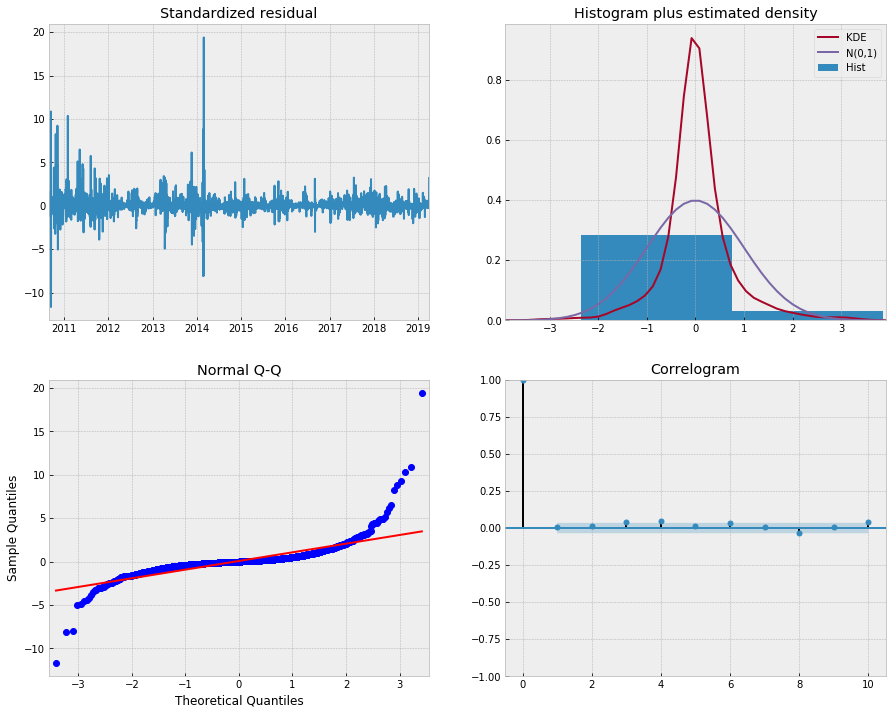

In [26]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])
dia = results.plot_diagnostics(figsize=(15, 12))

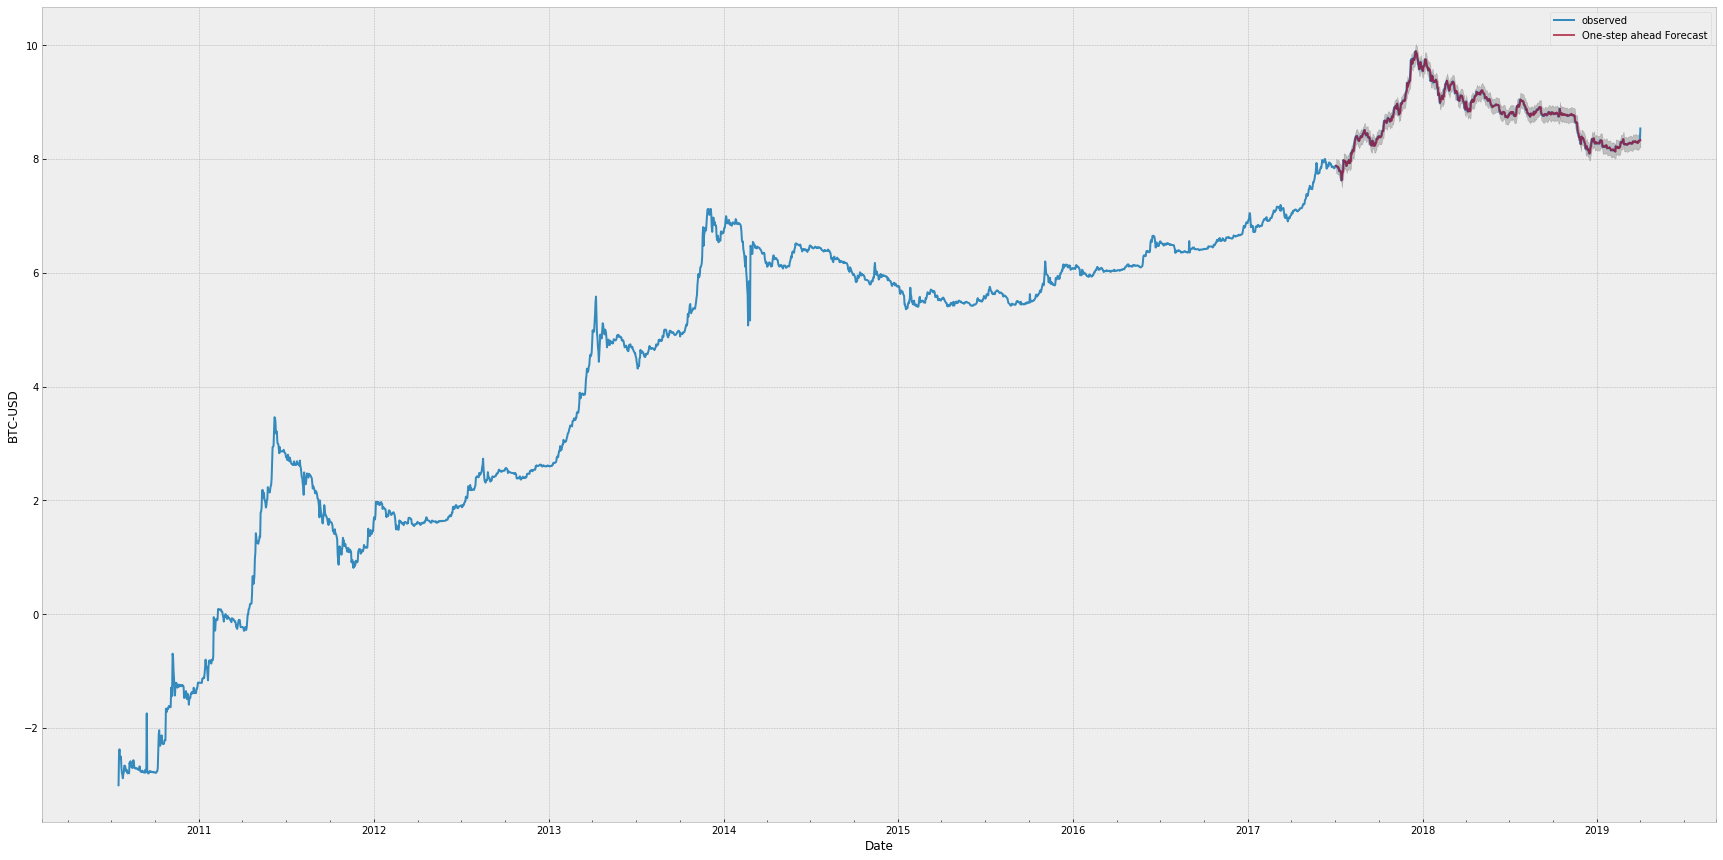

In [27]:
pred = results.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [28]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 0.0017
The R2 of our model is 0.9921


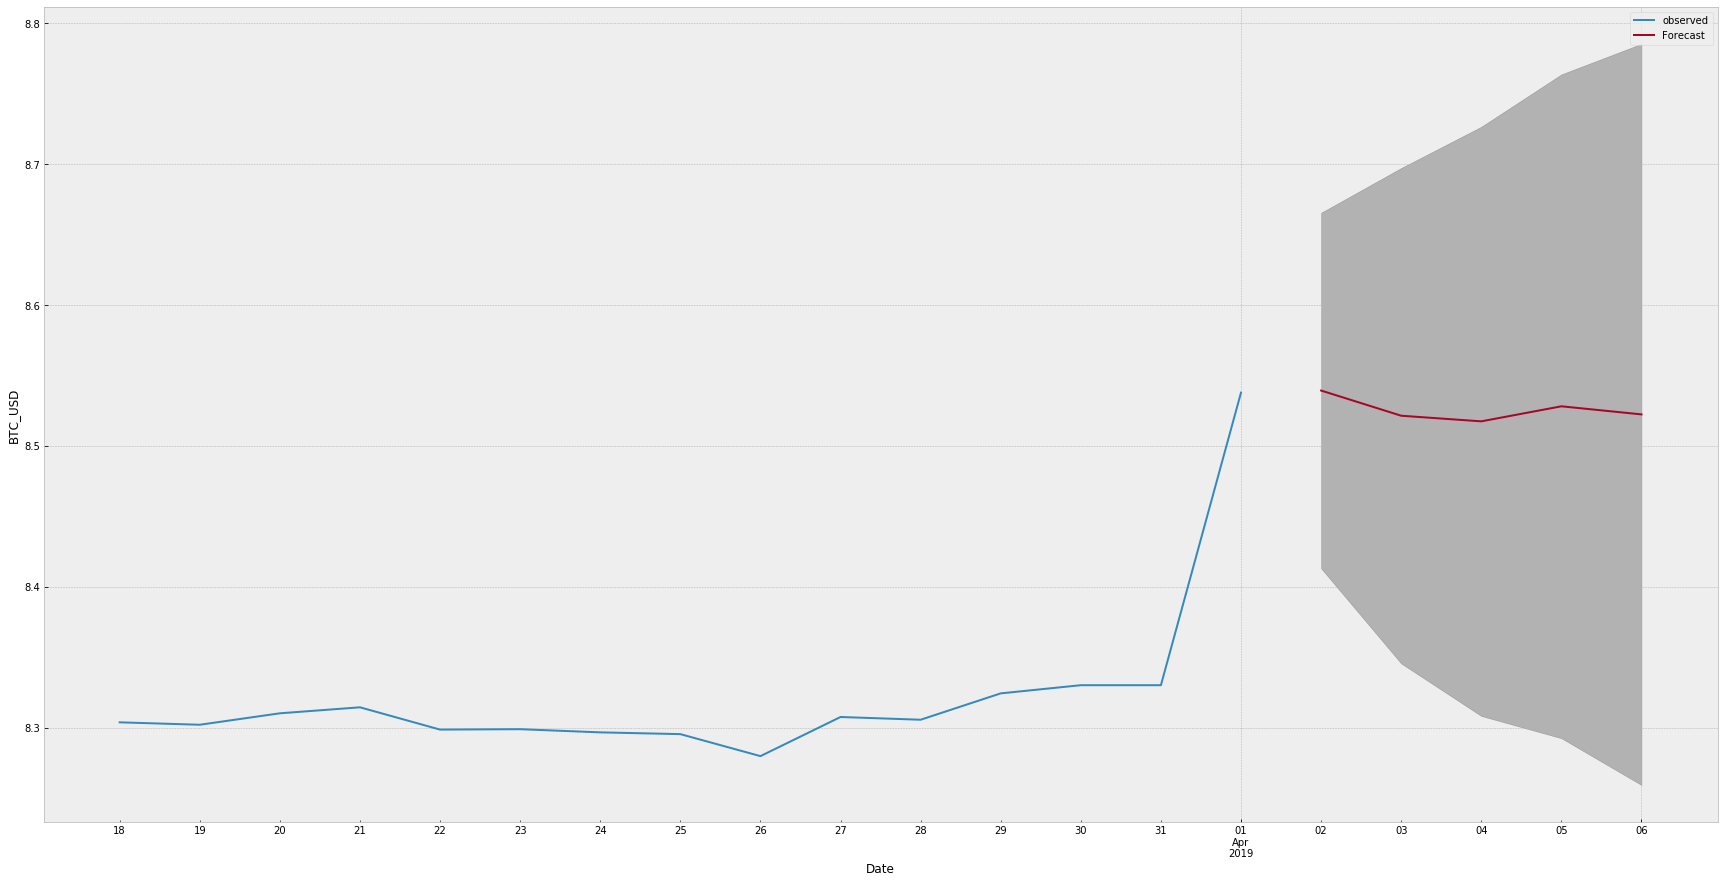

In [29]:
# Forcast the future
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

#### The advanced model slightly outperforms the baseline model.

<table><tr><td bgcolor=orange><font size=3> SARIMA for "Low"

In [36]:
y = np.log(data['Low'])

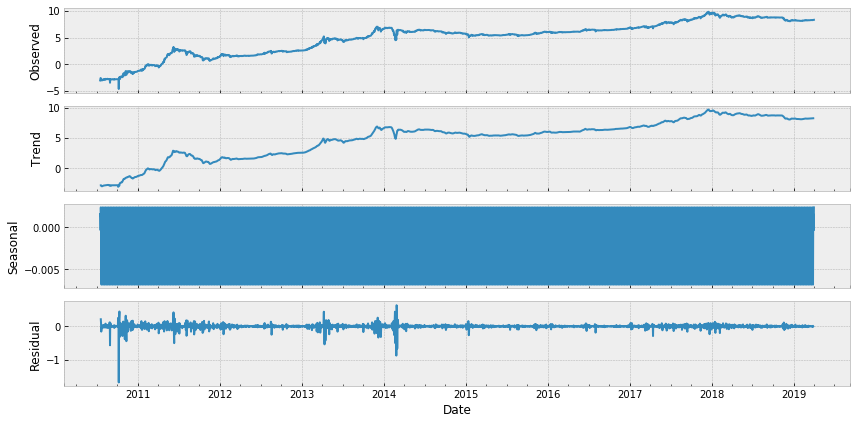

In [37]:
rcParams['figure.figsize'] = 12, 6

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [38]:
# y = y['2017':]

In [39]:
# rcParams['figure.figsize'] = 12, 6

# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()

### Build a Baseline Model

In [40]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.resample('MS').mean()
    rolstd = timeseries.resample('MS').std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    print()
    #Perform Ljung-Box test:
    print('Results of Ljung-Box Test:')
    lbtest = acorr_ljungbox(timeseries, lags=5)
    for i in range(5):
        print('Largest Lag Included:{} Test Statistic={}  p-value={}'.format(i, lbtest[0][i], lbtest[1][i]))

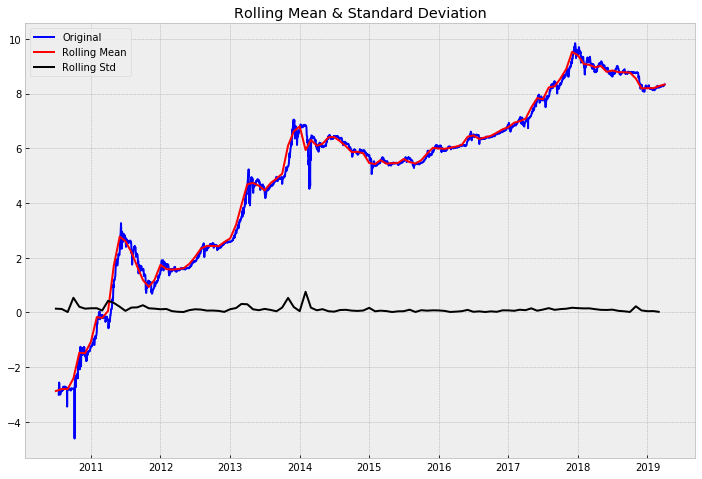

Results of Dickey-Fuller Test:
Test Statistic                   -2.672373
p-value                           0.078942
#Lags Used                       27.000000
Number of Observations Used    3154.000000
Critical Value (1%)              -3.432425
Critical Value (5%)              -2.862457
Critical Value (10%)             -2.567258
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=3174.089331779854  p-value=0.0
Largest Lag Included:1 Test Statistic=6339.617286642125  p-value=0.0
Largest Lag Included:2 Test Statistic=9497.337120627568  p-value=0.0
Largest Lag Included:3 Test Statistic=12647.733621932519  p-value=0.0
Largest Lag Included:4 Test Statistic=15790.023886673014  p-value=0.0


In [41]:
test_stationarity(y)

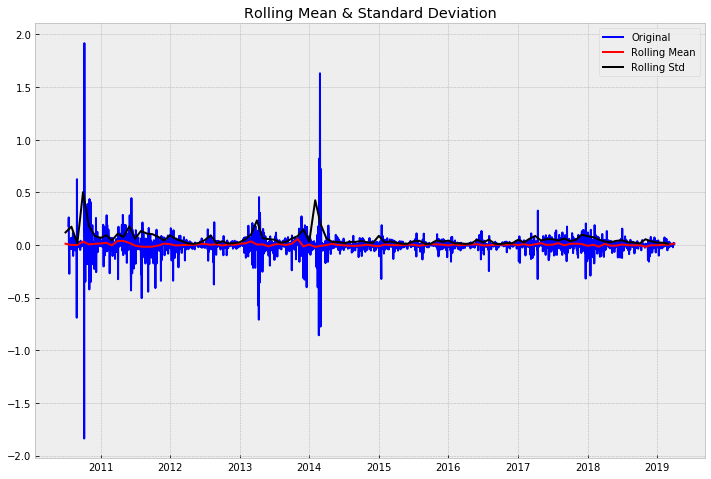

Results of Dickey-Fuller Test:
Test Statistic                -1.010509e+01
p-value                        1.034988e-17
#Lags Used                     2.600000e+01
Number of Observations Used    3.154000e+03
Critical Value (1%)           -3.432425e+00
Critical Value (5%)           -2.862457e+00
Critical Value (10%)          -2.567258e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=100.6349660477878  p-value=1.1059796631113384e-23
Largest Lag Included:1 Test Statistic=109.38382649383888  p-value=1.7684951459591894e-24
Largest Lag Included:2 Test Statistic=138.10363410349305  p-value=9.690155357221943e-30
Largest Lag Included:3 Test Statistic=171.95298635824258  p-value=3.9836881357003775e-36
Largest Lag Included:4 Test Statistic=171.9558336035858  p-value=2.7910262203922226e-35


In [42]:
test_stationarity(y.diff(1).dropna())

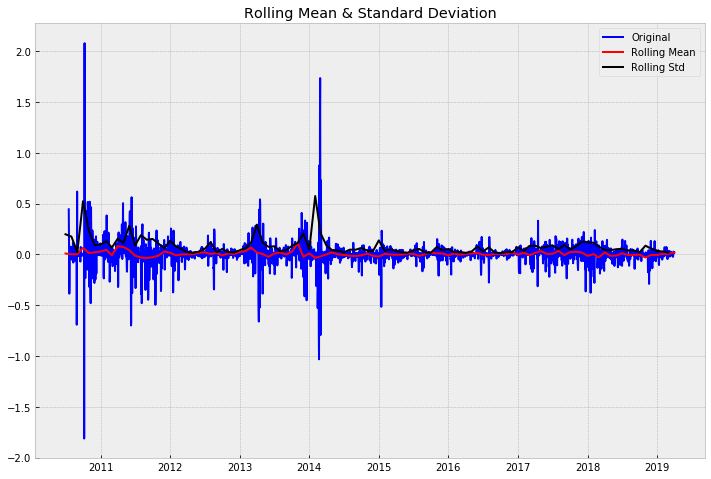

Results of Dickey-Fuller Test:
Test Statistic                -9.835796e+00
p-value                        4.899510e-17
#Lags Used                     2.900000e+01
Number of Observations Used    3.150000e+03
Critical Value (1%)           -3.432428e+00
Critical Value (5%)           -2.862458e+00
Critical Value (10%)          -2.567259e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=409.118093426817  p-value=5.702895041774165e-91
Largest Lag Included:1 Test Statistic=578.4728379212585  p-value=2.4334323650419002e-126
Largest Lag Included:2 Test Statistic=600.9982437063636  p-value=6.123321358014364e-130
Largest Lag Included:3 Test Statistic=616.5223997389294  p-value=4.113271233937206e-132
Largest Lag Included:4 Test Statistic=637.2293957250665  p-value=1.822637795556649e-135


In [43]:
test_stationarity(y.diff(2).dropna())

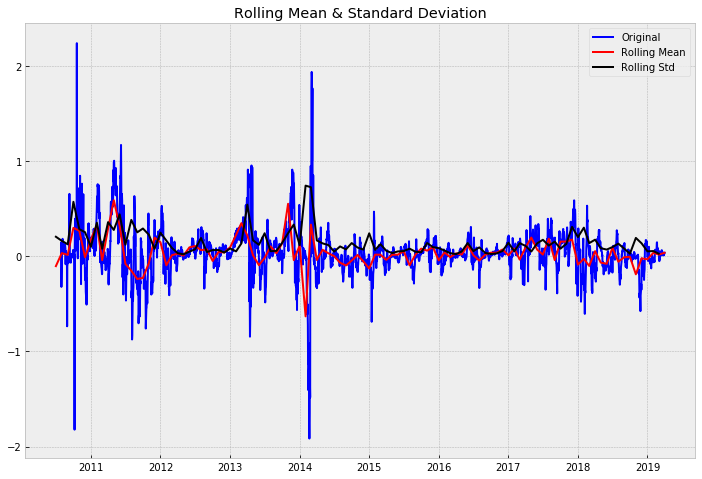

Results of Dickey-Fuller Test:
Test Statistic                -7.511559e+00
p-value                        4.003021e-11
#Lags Used                     2.900000e+01
Number of Observations Used    3.140000e+03
Critical Value (1%)           -3.432434e+00
Critical Value (5%)           -2.862461e+00
Critical Value (10%)          -2.567260e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=2314.874503348493  p-value=0.0
Largest Lag Included:1 Test Statistic=4178.942465252809  p-value=0.0
Largest Lag Included:2 Test Statistic=5697.700553283478  p-value=0.0
Largest Lag Included:3 Test Statistic=7041.727686578291  p-value=0.0
Largest Lag Included:4 Test Statistic=8072.238076367157  p-value=0.0


In [44]:
test_stationarity(y.diff(12).dropna())

#### According to the decomposition of y_train, seasonality is relatively small. 
#### Comparing the results of the first and second difference, we use the first difference.

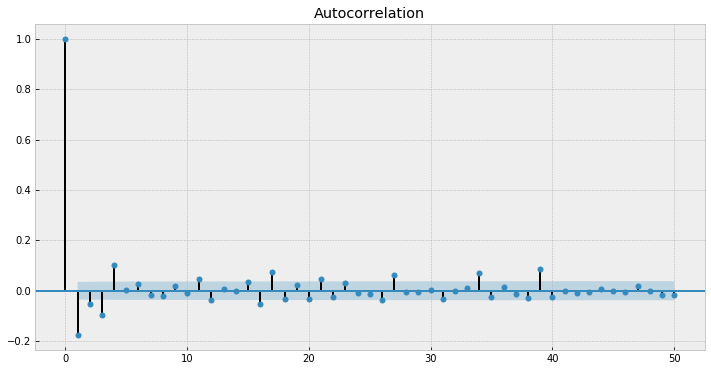

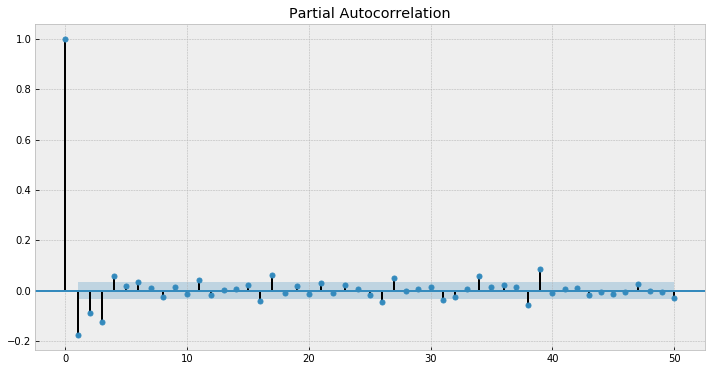

In [45]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
acf = plot_acf(y.diff(1).dropna(), lags=50)
pacf = plot_pacf(y.diff(1).dropna(), lags=50)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0085   2.45e-05    347.924      0.000       0.008       0.009
-6131.885041155496


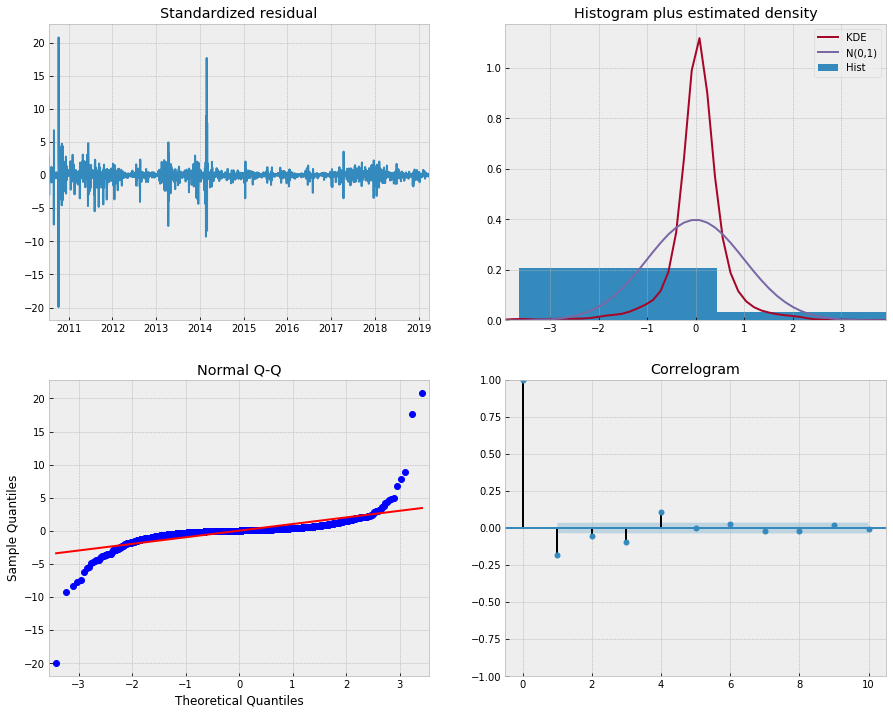

In [46]:
mod_baseline = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order = (0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_baseline = mod_baseline.fit()

print(results_baseline.summary().tables[1])
print(results_baseline.aic)
b = results_baseline.plot_diagnostics(figsize=(15, 12))

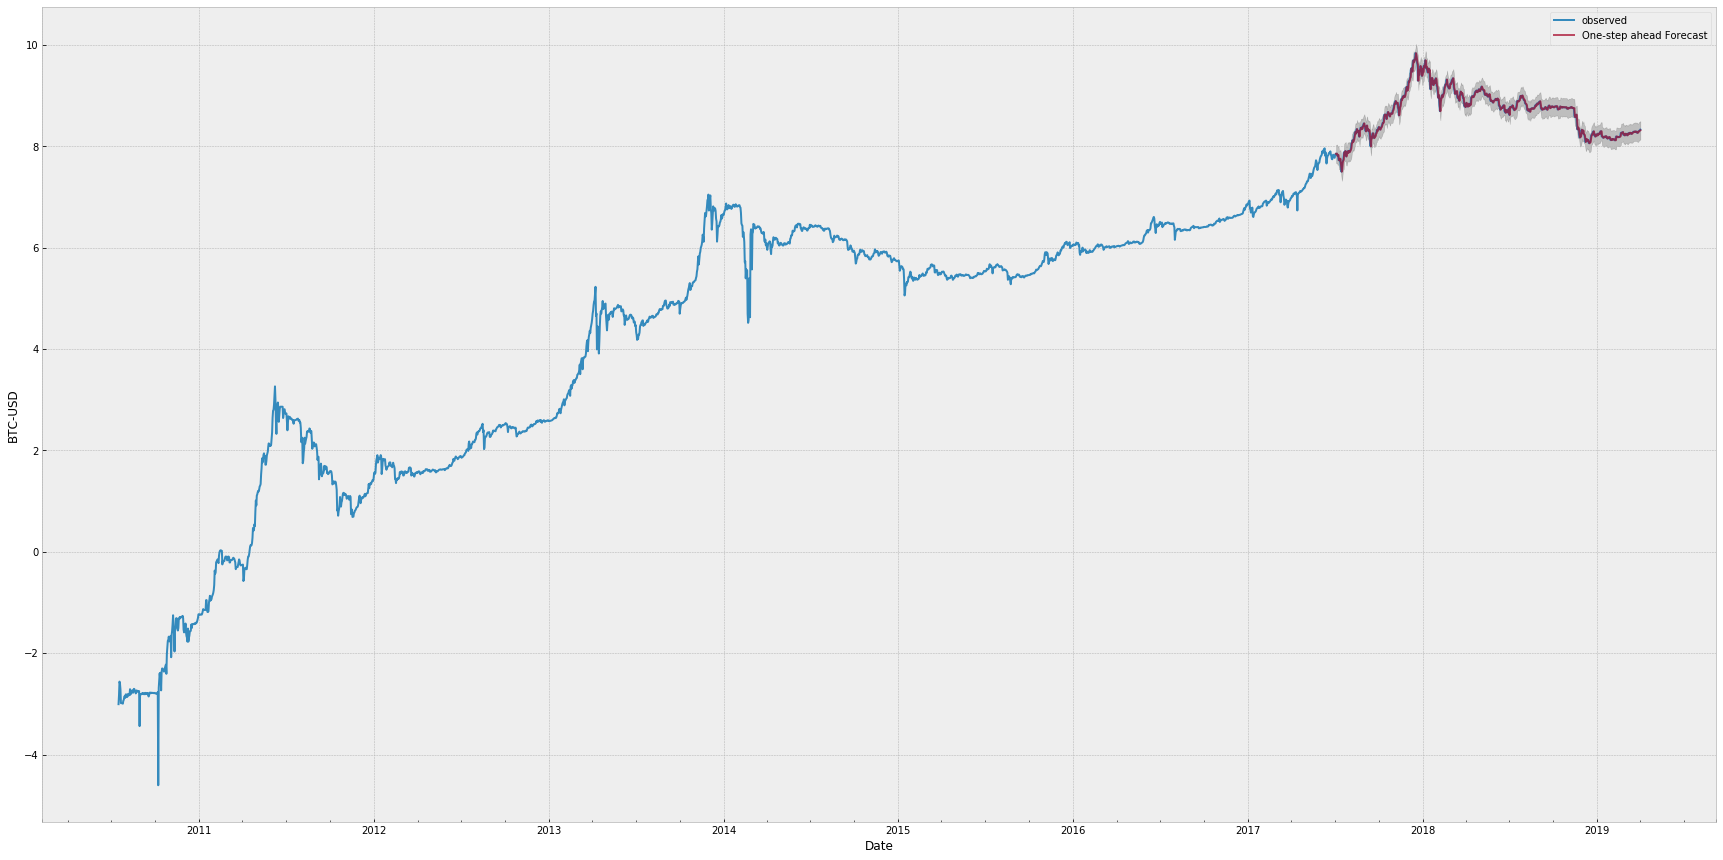

In [47]:
pred = results_baseline.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [48]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 0.0024
The R2 of our model is 0.9879


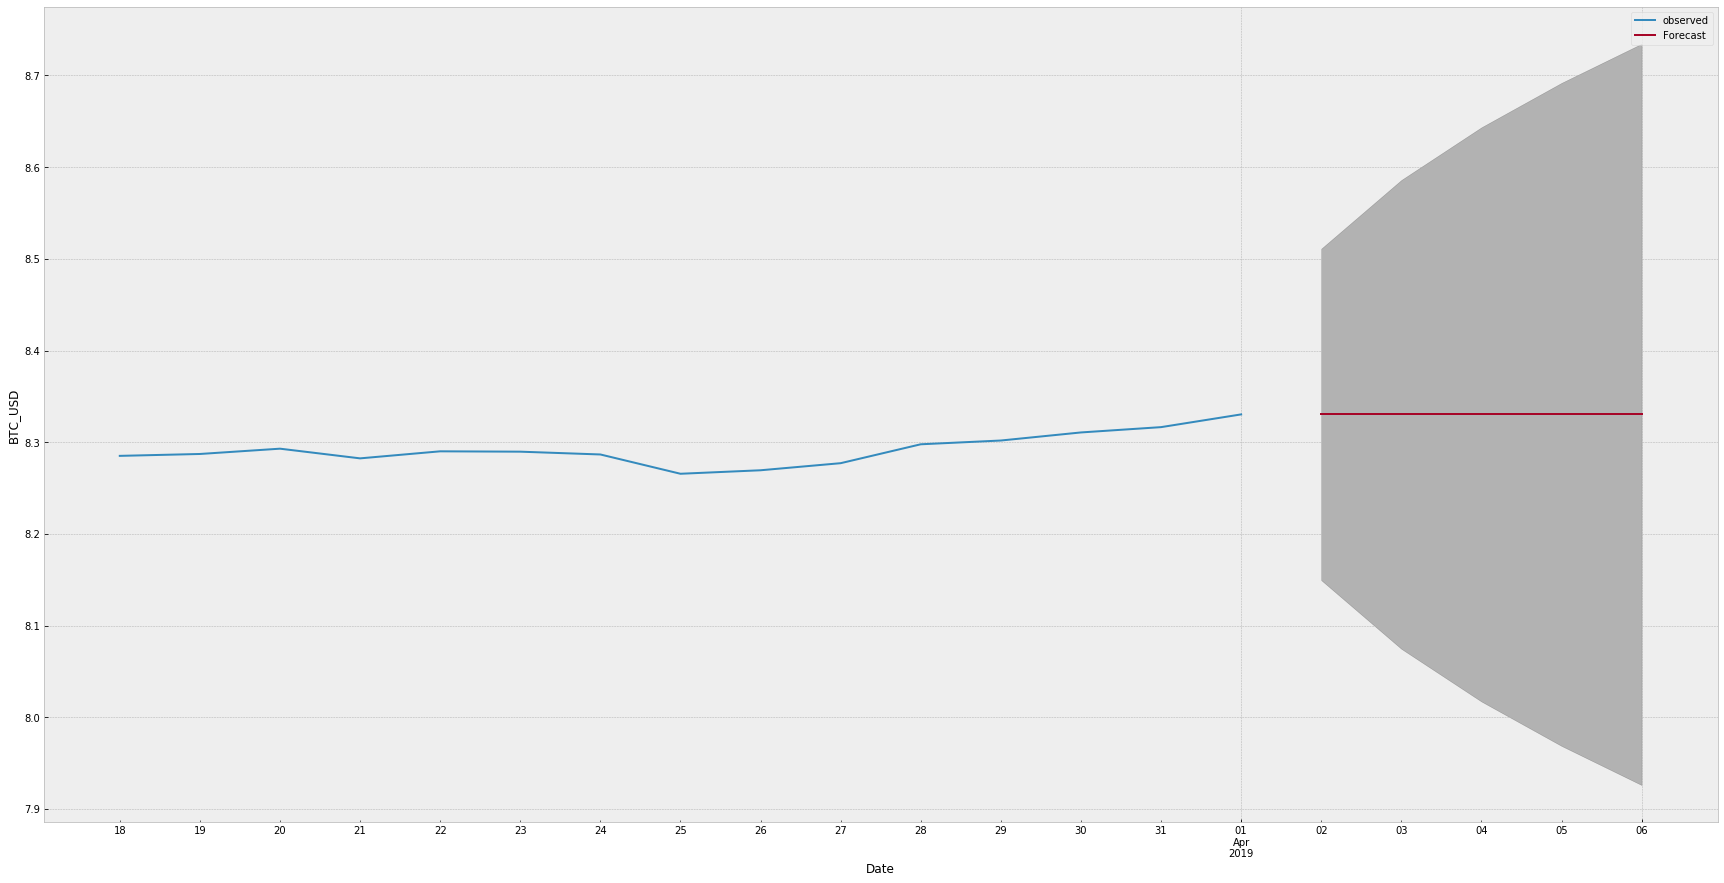

In [49]:
# Forcast the future
pred_uc = results_baseline.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

### Build an Advanced Model by Grid Search

In [50]:
# d = [1]
# p = q = range(21)
# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(0, 0, 0, 12)]

# print('Examples of parameter combinations for Seasonal ARIMA...')
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
# print('SARIMAX: {} x {}'.format(pdq[-2], seasonal_pdq[0]))
# print('SARIMAX: {} x {}'.format(pdq[-1], seasonal_pdq[0]))

d = [1]
p = q = range(4)
pdq = list(itertools.product(p, d, q))
D = range(3)
P = Q = range(4)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]


print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 1) x (0, 0, 2, 12)
SARIMAX: (0, 1, 2) x (0, 0, 3, 12)
SARIMAX: (0, 1, 2) x (0, 1, 0, 12)


In [51]:
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)

        except:
            continue

print('Finished...')

AIC_list = AIC_list.dropna()
m = np.amin(AIC_list['AIC'].values) # Find the minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find the index number of the lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-6131.885041155496
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-6118.419965190611
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:-6085.339203990957
ARIMA(0, 1, 0)x(0, 0, 3, 12)12 - AIC:-6050.414244886169
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-3796.7434076693835
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-6032.088425085245
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:-6011.379025677915
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:-6031.368461481767
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:-279.2005611248667
ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:-3692.8638697206525
ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC:-5881.6220533676515
ARIMA(0, 1, 0)x(0, 2, 3, 12)12 - AIC:-5901.082214915383
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-6121.221682319992
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-6116.41997688211
ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:-6083.3519596892675
ARIMA(0, 1, 0)x(1, 0, 3, 12)12 - AIC:-6123.0861983645955
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-4748.631415914331
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-6036.7

ARIMA(0, 1, 3)x(0, 0, 3, 12)12 - AIC:-6180.861938224078
ARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:-3977.6010858196914
ARIMA(0, 1, 3)x(0, 1, 1, 12)12 - AIC:-6170.428564655837
ARIMA(0, 1, 3)x(0, 1, 2, 12)12 - AIC:-6145.569768148136
ARIMA(0, 1, 3)x(0, 1, 3, 12)12 - AIC:-6158.910605194847
ARIMA(0, 1, 3)x(0, 2, 0, 12)12 - AIC:-465.4894242429614
ARIMA(0, 1, 3)x(0, 2, 1, 12)12 - AIC:-3867.564686278862
ARIMA(0, 1, 3)x(0, 2, 2, 12)12 - AIC:-6017.800768484347
ARIMA(0, 1, 3)x(0, 2, 3, 12)12 - AIC:-6024.902338601077
ARIMA(0, 1, 3)x(1, 0, 0, 12)12 - AIC:-6261.346237983481
ARIMA(0, 1, 3)x(1, 0, 1, 12)12 - AIC:-6248.253606984194
ARIMA(0, 1, 3)x(1, 0, 2, 12)12 - AIC:-6213.780348267652
ARIMA(0, 1, 3)x(1, 0, 3, 12)12 - AIC:-6244.734933865908
ARIMA(0, 1, 3)x(1, 1, 0, 12)12 - AIC:-4919.5917592845535
ARIMA(0, 1, 3)x(1, 1, 1, 12)12 - AIC:-6173.588250313895
ARIMA(0, 1, 3)x(1, 1, 2, 12)12 - AIC:-6178.8135301846905
ARIMA(0, 1, 3)x(1, 1, 3, 12)12 - AIC:-6220.309678688024
ARIMA(0, 1, 3)x(1, 2, 0, 12)12 - AIC:-2324.96

ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:-6141.676200928266
ARIMA(1, 1, 2)x(0, 1, 3, 12)12 - AIC:-6154.389909222224
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:-459.47760721971065
ARIMA(1, 1, 2)x(0, 2, 1, 12)12 - AIC:-3858.680173405793
ARIMA(1, 1, 2)x(0, 2, 2, 12)12 - AIC:-5999.02759462166
ARIMA(1, 1, 2)x(0, 2, 3, 12)12 - AIC:-6006.630695563768
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:-6253.0580966302405
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:-6245.926723052966
ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:-6211.454324980246
ARIMA(1, 1, 2)x(1, 0, 3, 12)12 - AIC:-6242.134862880658
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:-4899.965915127651
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:-6169.187266695662
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:-6175.016502922005
ARIMA(1, 1, 2)x(1, 1, 3, 12)12 - AIC:-6216.47658994376
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:-2310.1019181656916
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:-4798.571139178927
ARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:-5997.643884200049
ARIMA(1, 1, 2)x(1, 2, 3, 12)12 - AIC:-6011.8099

ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:-3970.005846592693
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:-5995.196500644577
ARIMA(2, 1, 1)x(0, 2, 3, 12)12 - AIC:-5973.000804168828
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:-6250.965902550246
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:-6248.993609033943
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:-6214.825355979918
ARIMA(2, 1, 1)x(1, 0, 3, 12)12 - AIC:-6181.135034611139
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:-4898.807854361585
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:-6172.291340953406
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:-6177.7845549024005
ARIMA(2, 1, 1)x(1, 1, 3, 12)12 - AIC:-6218.589700964437
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:-2308.0904697869637
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:-4800.304820731917
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:-5974.119663612794
ARIMA(2, 1, 1)x(1, 2, 3, 12)12 - AIC:-6004.1974833518325
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:-6216.919239206902
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:-6215.002093916923
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:-6214.06

ARIMA(3, 1, 0)x(1, 0, 0, 12)12 - AIC:-6278.594332665054
ARIMA(3, 1, 0)x(1, 0, 1, 12)12 - AIC:-6276.670653265211
ARIMA(3, 1, 0)x(1, 0, 2, 12)12 - AIC:-6247.7163255726755
ARIMA(3, 1, 0)x(1, 0, 3, 12)12 - AIC:-6276.403650966078
ARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:-4954.931007437873
ARIMA(3, 1, 0)x(1, 1, 1, 12)12 - AIC:-6202.509525257064
ARIMA(3, 1, 0)x(1, 1, 2, 12)12 - AIC:-6214.331910574797
ARIMA(3, 1, 0)x(1, 1, 3, 12)12 - AIC:-6255.725082407562
ARIMA(3, 1, 0)x(1, 2, 0, 12)12 - AIC:-2359.8781859536116
ARIMA(3, 1, 0)x(1, 2, 1, 12)12 - AIC:-4857.059643166669
ARIMA(3, 1, 0)x(1, 2, 2, 12)12 - AIC:-6048.29820369275
ARIMA(3, 1, 0)x(1, 2, 3, 12)12 - AIC:-6063.684722436613
ARIMA(3, 1, 0)x(2, 0, 0, 12)12 - AIC:-6244.103025576361
ARIMA(3, 1, 0)x(2, 0, 1, 12)12 - AIC:-6242.1040259872225
ARIMA(3, 1, 0)x(2, 0, 2, 12)12 - AIC:-6353.179884343357
ARIMA(3, 1, 0)x(2, 0, 3, 12)12 - AIC:-6354.764983466126
ARIMA(3, 1, 0)x(2, 1, 0, 12)12 - AIC:-5352.691560085137
ARIMA(3, 1, 0)x(2, 1, 1, 12)12 - AIC:-6167.080

ARIMA(3, 1, 3)x(1, 0, 3, 12)12 - AIC:-6280.31968991676
ARIMA(3, 1, 3)x(1, 1, 0, 12)12 - AIC:-4965.381270892673
ARIMA(3, 1, 3)x(1, 1, 1, 12)12 - AIC:-6205.607814686934
ARIMA(3, 1, 3)x(1, 1, 2, 12)12 - AIC:-6219.28053711707
ARIMA(3, 1, 3)x(1, 1, 3, 12)12 - AIC:-6255.0512860825
ARIMA(3, 1, 3)x(1, 2, 0, 12)12 - AIC:-2561.1435802872825
ARIMA(3, 1, 3)x(1, 2, 1, 12)12 - AIC:-4865.304509314039
ARIMA(3, 1, 3)x(1, 2, 2, 12)12 - AIC:-6052.618001227013
ARIMA(3, 1, 3)x(1, 2, 3, 12)12 - AIC:-6064.942097274436
ARIMA(3, 1, 3)x(2, 0, 0, 12)12 - AIC:-6254.5239926179565
ARIMA(3, 1, 3)x(2, 0, 1, 12)12 - AIC:-6252.50617924133
ARIMA(3, 1, 3)x(2, 0, 2, 12)12 - AIC:-6342.9006342983175
ARIMA(3, 1, 3)x(2, 0, 3, 12)12 - AIC:-6357.892343791872
ARIMA(3, 1, 3)x(2, 1, 0, 12)12 - AIC:-5360.792973868785
ARIMA(3, 1, 3)x(2, 1, 1, 12)12 - AIC:-6173.902064904683
ARIMA(3, 1, 3)x(2, 1, 2, 12)12 - AIC:-6229.546639688367
ARIMA(3, 1, 3)x(2, 1, 3, 12)12 - AIC:-6327.985046842198
ARIMA(3, 1, 3)x(2, 2, 0, 12)12 - AIC:-3384.4756812

### Min_AIC_list ### 
param                 (3, 1, 3)
param_seasonal    (3, 0, 3, 12)
AIC                    -6398.17
Name: 759, dtype: object
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0536      0.067      0.797      0.425      -0.078       0.185
ar.L2         -0.2712      0.063     -4.321      0.000      -0.394      -0.148
ar.L3         -0.3395      0.035     -9.711      0.000      -0.408      -0.271
ma.L1         -0.2333      0.068     -3.407      0.001      -0.368      -0.099
ma.L2          0.2194      0.072      3.053      0.002       0.079       0.360
ma.L3          0.2210      0.040      5.496      0.000       0.142       0.300
ar.S.L12      -0.4254      0.024    -17.732      0.000      -0.472      -0.378
ar.S.L24       0.4267      0.018     24.041      0.000       0.392       0.462
ar.S.L36       0.7662      0.010     78.986      0.000       0.747 

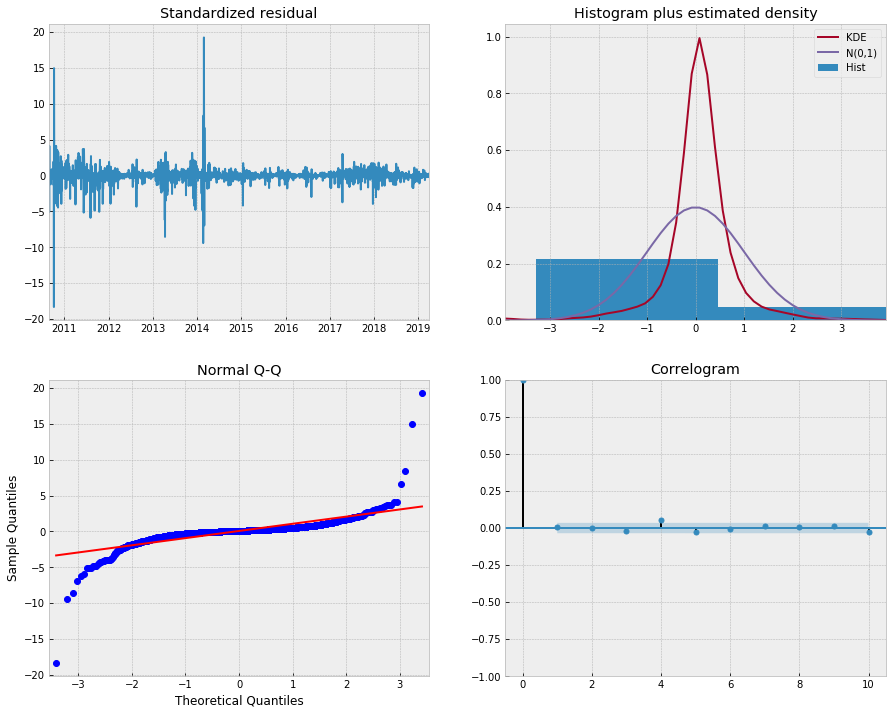

In [52]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])
dia = results.plot_diagnostics(figsize=(15, 12))

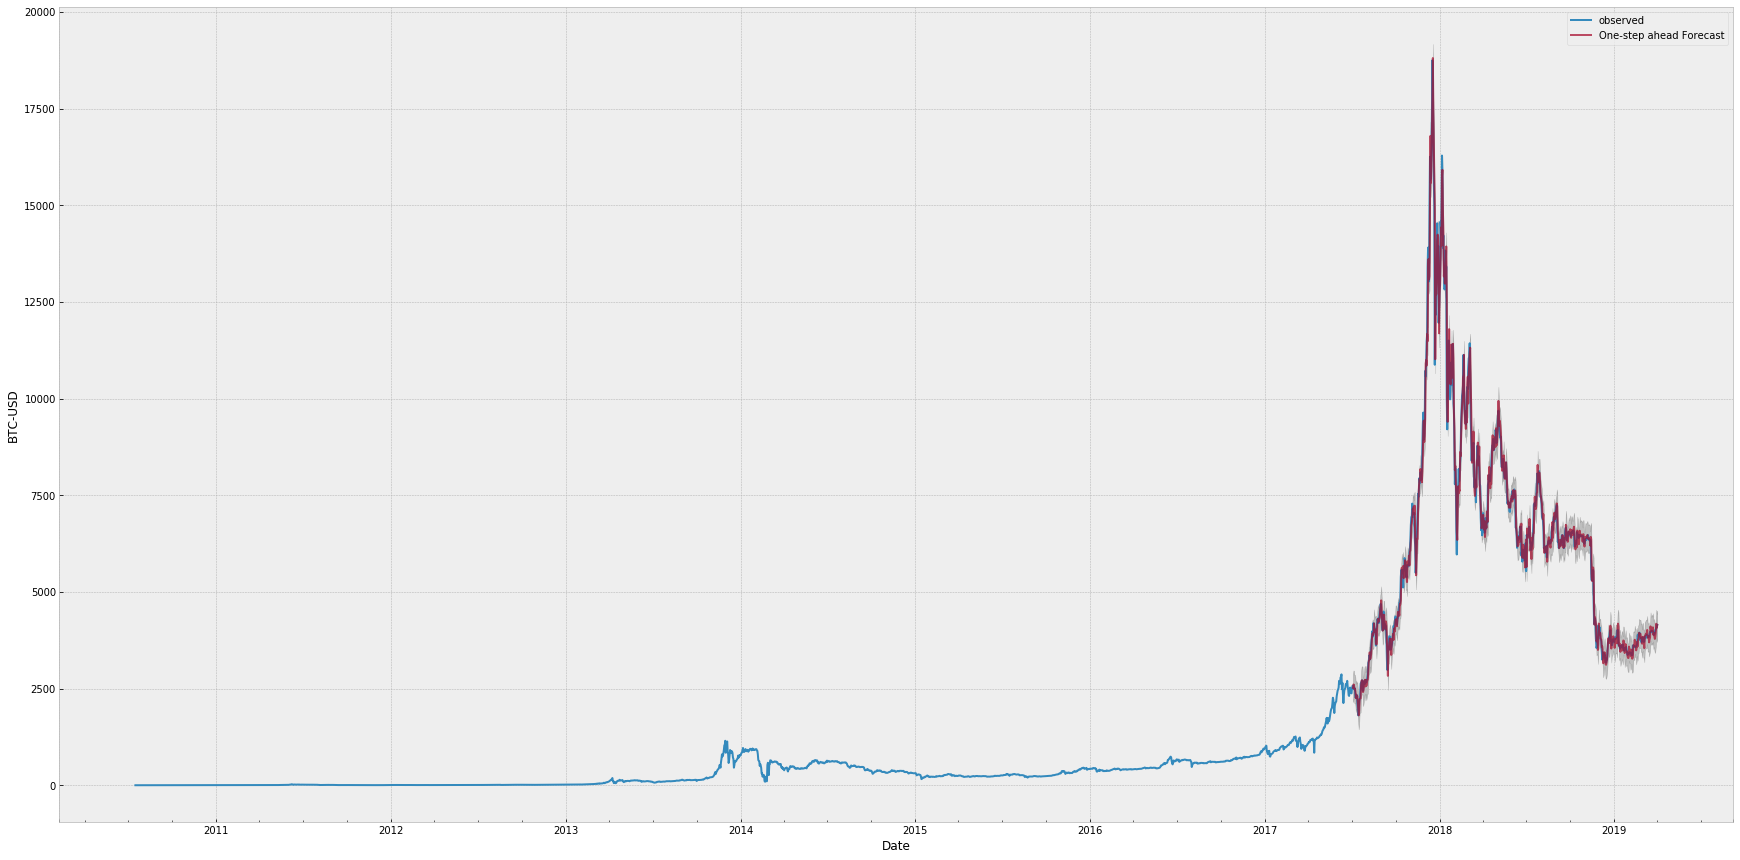

In [44]:
pred = results.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [45]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 153334.7817
The R2 of our model is 0.9827


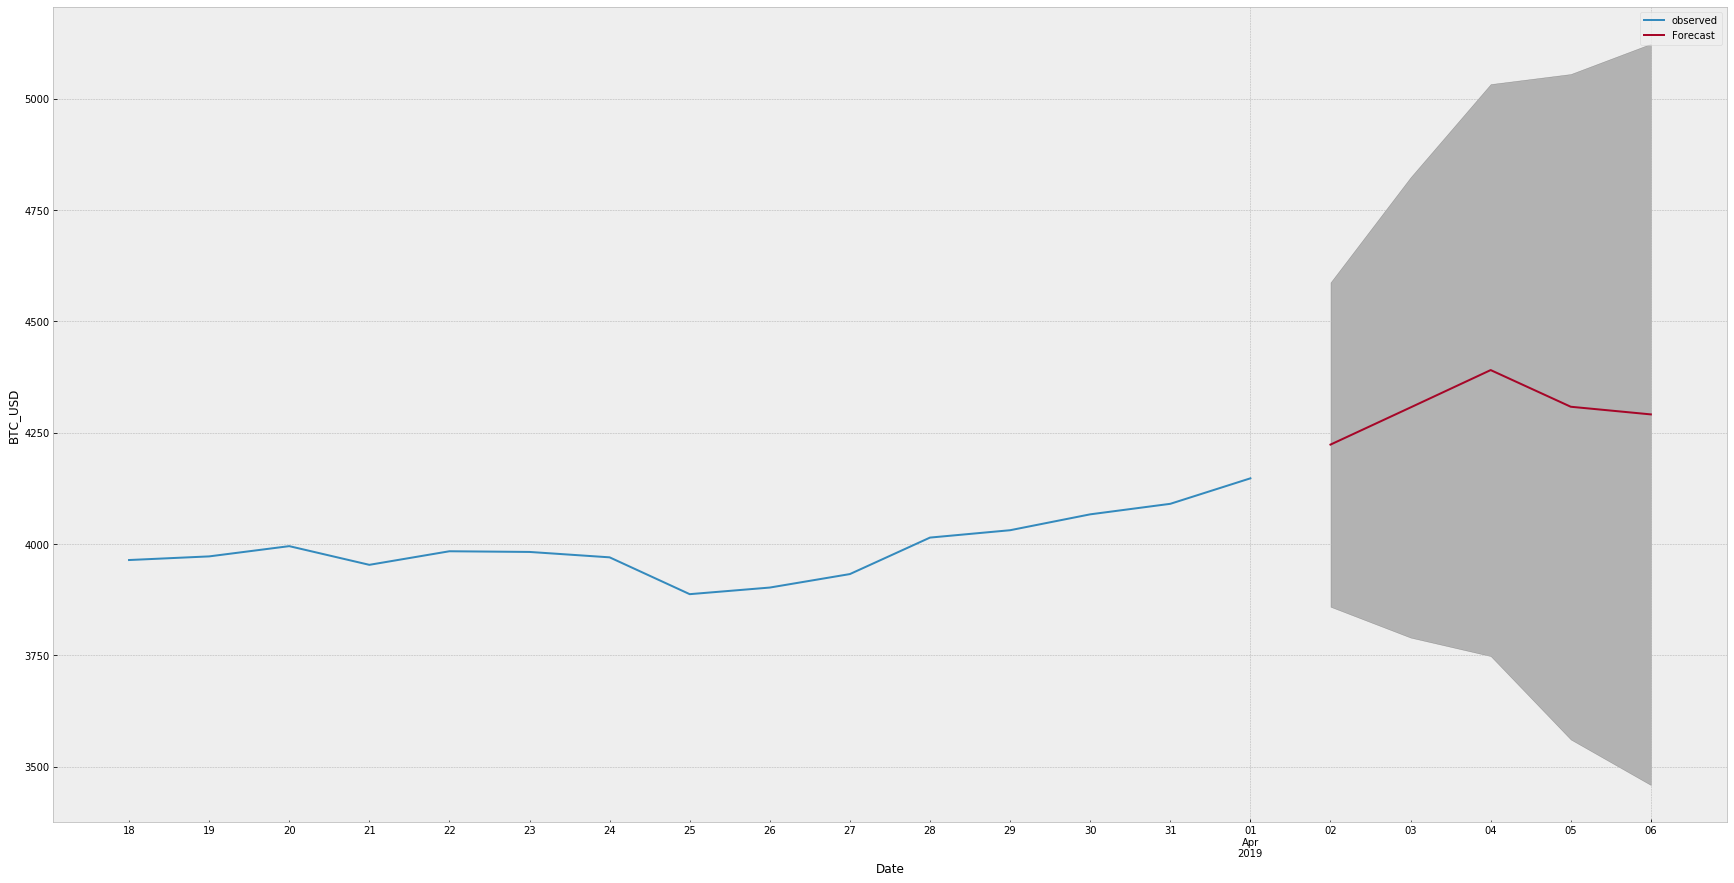

In [46]:
# Forcast the future
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

#### The advanced model slightly outperforms the baseline model.